## <center> Matplotlib (pyplot) vs Seaborn </center> 

### Resources
https://www.w3schools.com/python/matplotlib_intro.asp  
https://matplotlib.org/stable/tutorials/index.html

In [2]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rdatasets

In [3]:
# Dataset 
dataset = rdatasets.data('iris')
df = pd.DataFrame(dataset)

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### For reference: 

<div>
<img src=resources/anatomy.png width="600"/>
</div>

### Matplotlib structure 

There's a procedural way to use matplotlib and an object oriented way.</br>
The former uses plt.plot() and lets you add more stuff to it as you go but it only creates one plot in one figure.  
The latter can be used to divide the figure into a grid, with each portion getting a different plot

#### Lineplot

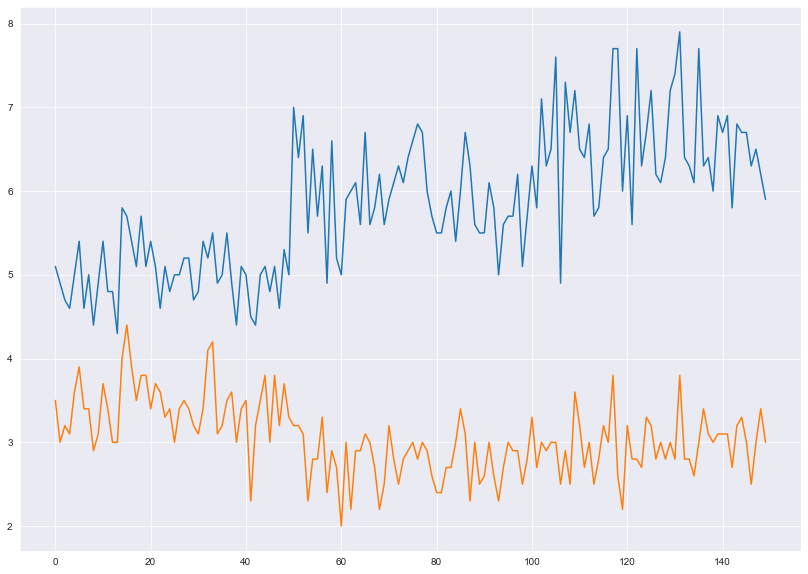

In [17]:
plt.figure(figsize=(14,10))
plt.plot(df[['Sepal.Length','Sepal.Width']])

#### Scatterplot

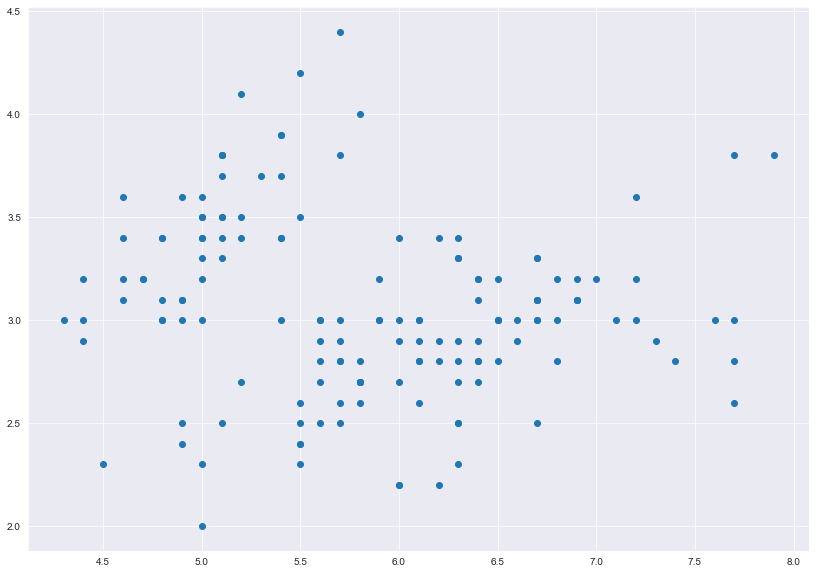

In [46]:
plt.figure(figsize=(14,10))
plt.scatter(x=df['Sepal.Length'],y=df['Sepal.Width'])

<p>Note: Colors in matplotlib for each categorical variable in the scatterplot will need to be added using either 'c' or 'cmap'.</p>
<p>This can be easily achieved in seaborn via hue.</p>

#### Histogram 

(array([ 4., 18., 30., 31., 32., 22.,  7.,  6.]),
 array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 8 artists>)

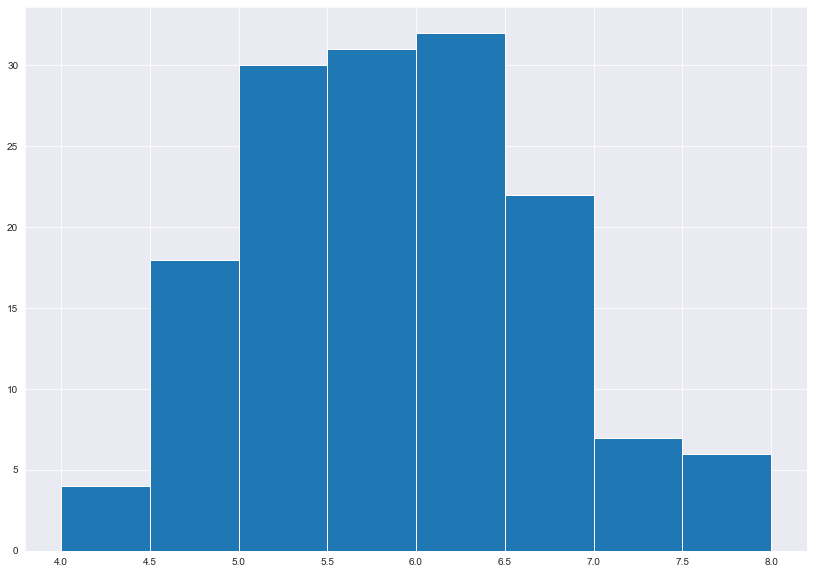

In [57]:
plt.figure(figsize=(14,10))
plt.hist(x=df['Sepal.Length'],bins=[4,4.5,5,5.5,6,6.5,7,7.5,8])

Ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Note: The bins (if specified via a sequence, is of the kind [a,b) and not [a,b] except for the last interval

#### Bargraph 

In [96]:
df.groupby(['Species']).size().reset_index()

,Species,0
0,setosa,50
1,versicolor,50
2,virginica,50


In [91]:
new_df = df.groupby(['Species']).size().reset_index()

In [93]:
new_df = new_df.rename(columns={'Species': 'Species', 0: 'counts'})

In [94]:
new_df

,Species,counts
0,setosa,50
1,versicolor,50
2,virginica,50


<BarContainer object of 3 artists>

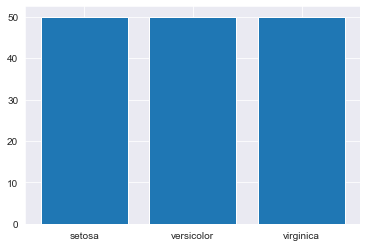

In [95]:
plt.bar(x=new_df['Species'], height=new_df['counts'])

#### Boxplot 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f81369f7970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f81369c14f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8136b04bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f81233a2d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f81233a2f10>],
 'means': []}

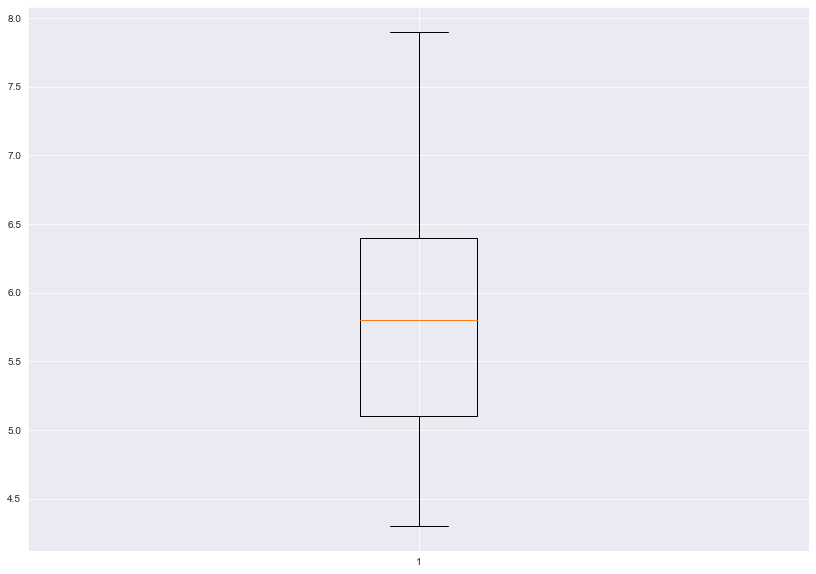

In [100]:
plt.figure(figsize=(14,10))
plt.boxplot(x=df['Sepal.Length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f80c8f75f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f80c8fcc610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f80c8f75bb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f80c8fcccd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80c8fe4070>,
 'means': []}

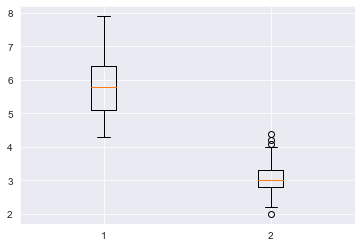

In [121]:
plt.subplots()
plt.boxplot(df[['Sepal.Length','Sepal.Width']])

## Seaborn way 

Built on top of matplotlib, seaborn handles pandas dataframes much better than matplotlib.

### Lineplot 

<AxesSubplot:>

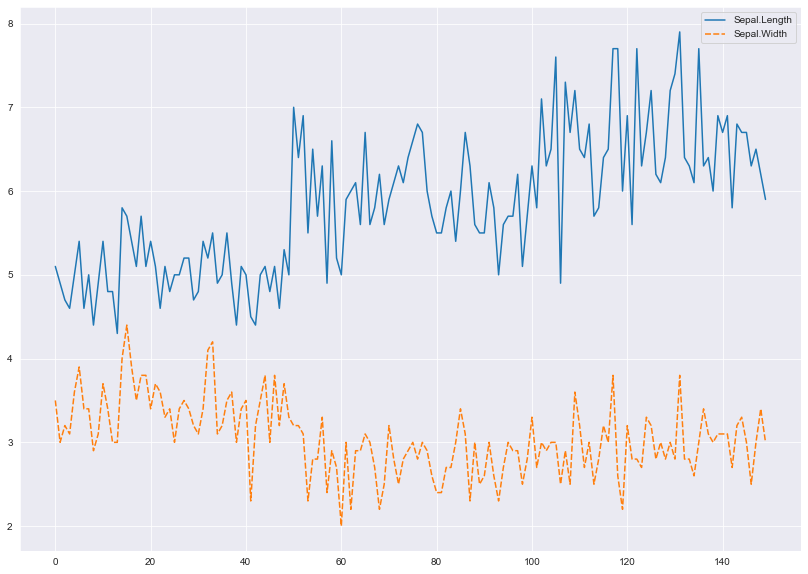

In [40]:
plt.figure(figsize=(14,10))
sns.set_style('darkgrid')
sns.lineplot(data=df[['Sepal.Length','Sepal.Width']])

### Scatterplot 

In [42]:
dia_df = sns.load_dataset('diamonds')

In [43]:
dia_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

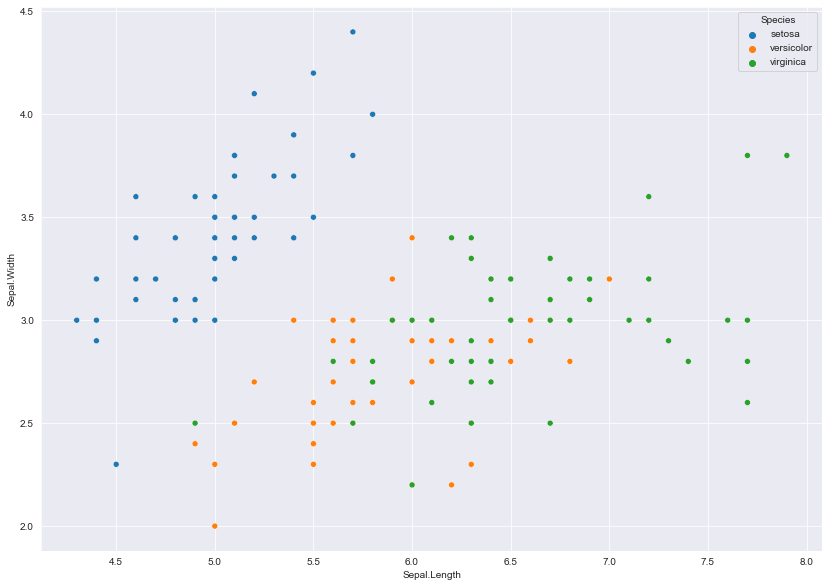

In [45]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=df, x='Sepal.Length', y='Sepal.Width', hue='Species')

### Histogram 

<AxesSubplot:xlabel='Sepal.Width', ylabel='Count'>

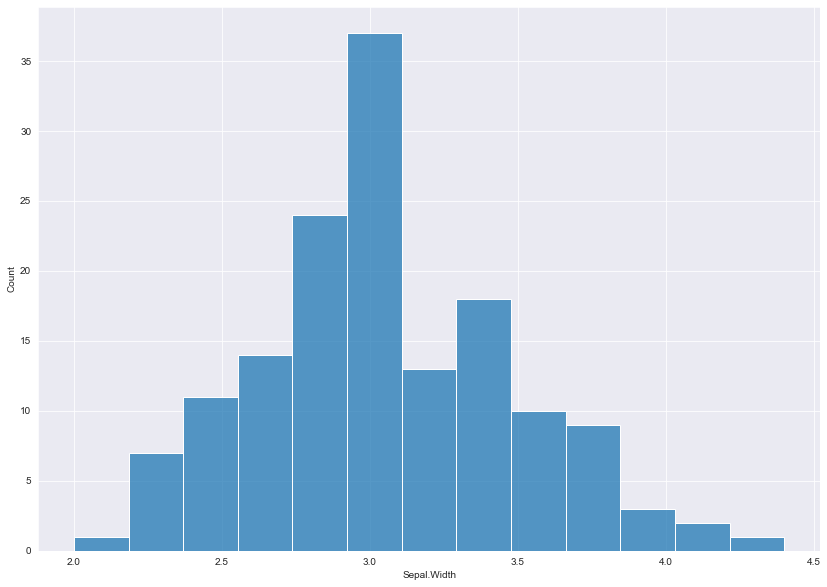

In [60]:
plt.figure(figsize=(14,10))
sns.histplot(data=df,x='Sepal.Width')

### Bargraph 

<AxesSubplot:xlabel='Species', ylabel='Sepal.Length'>

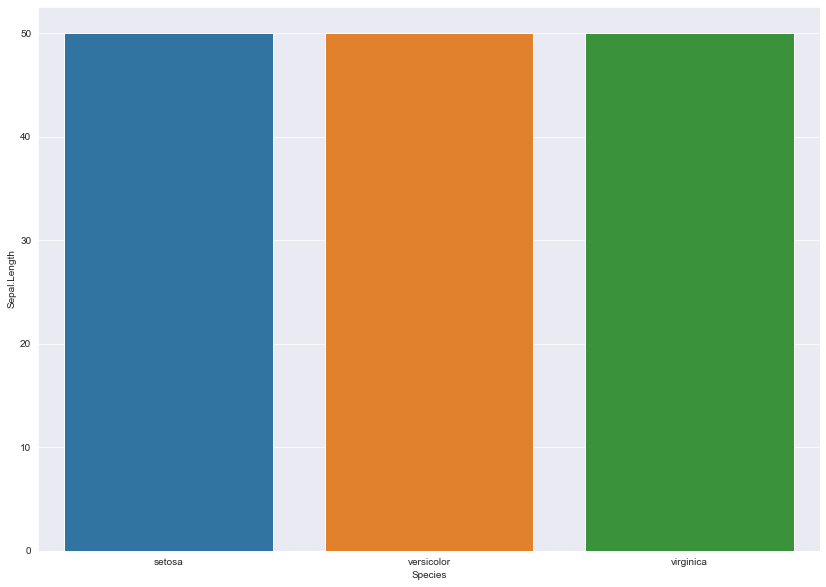

In [97]:
plt.figure(figsize=(14,10))
sns.barplot(data=df, x='Species', y='Sepal.Length',estimator=np.size)

### Boxplot 

<AxesSubplot:>

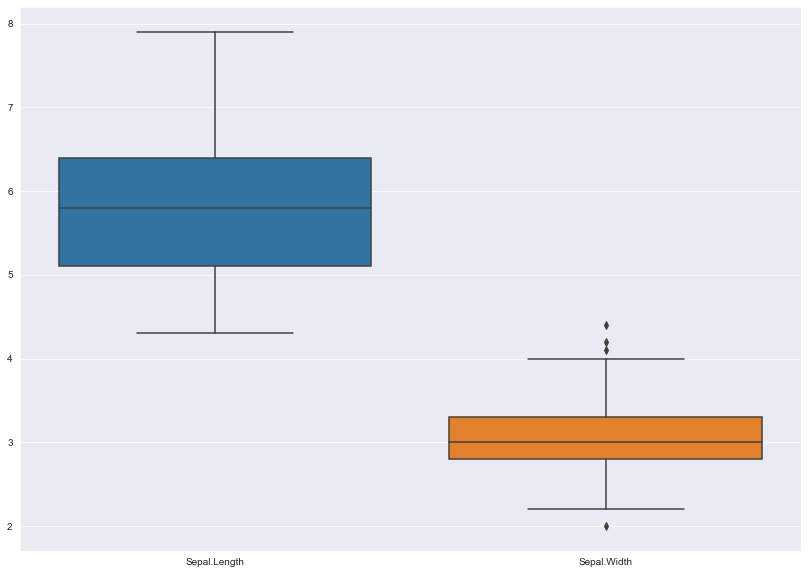

In [119]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df[['Sepal.Length','Sepal.Width','Species']])

## Data labelling 
Ref: https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9